<a href="https://colab.research.google.com/github/Spurthi10/Elevate_Labs-Internship/blob/main/_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load Titanic dataset
df = pd.read_csv('Titanic.csv')  # Replace with correct path if needed

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic info
print(df.info())

# Summary statistics for numeric features
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

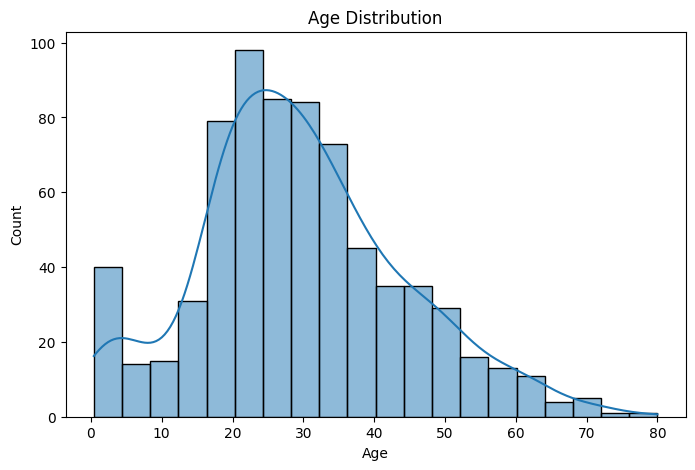

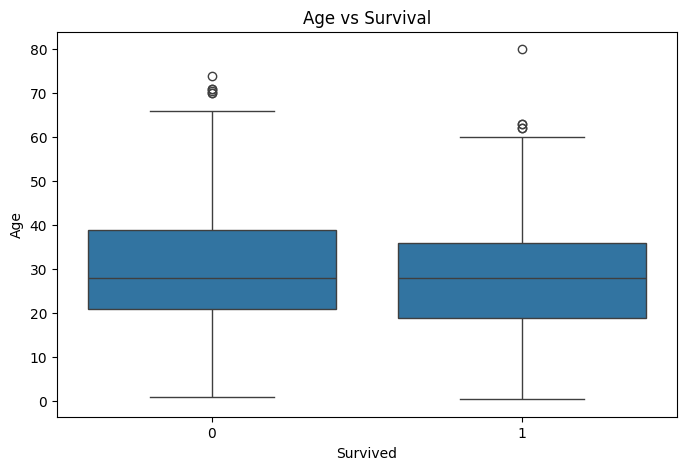

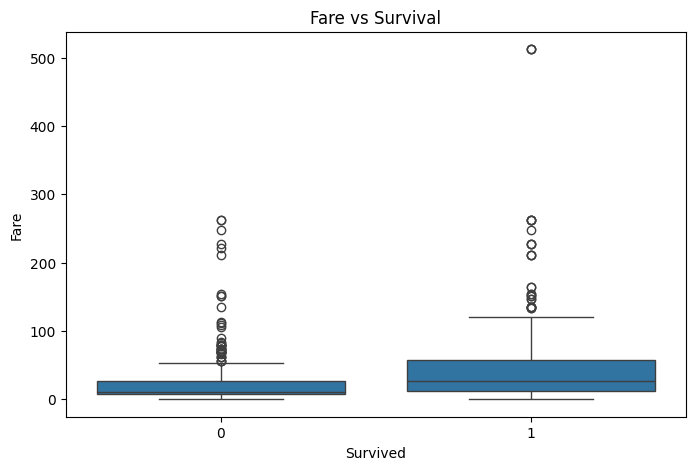

In [3]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for Age by Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()


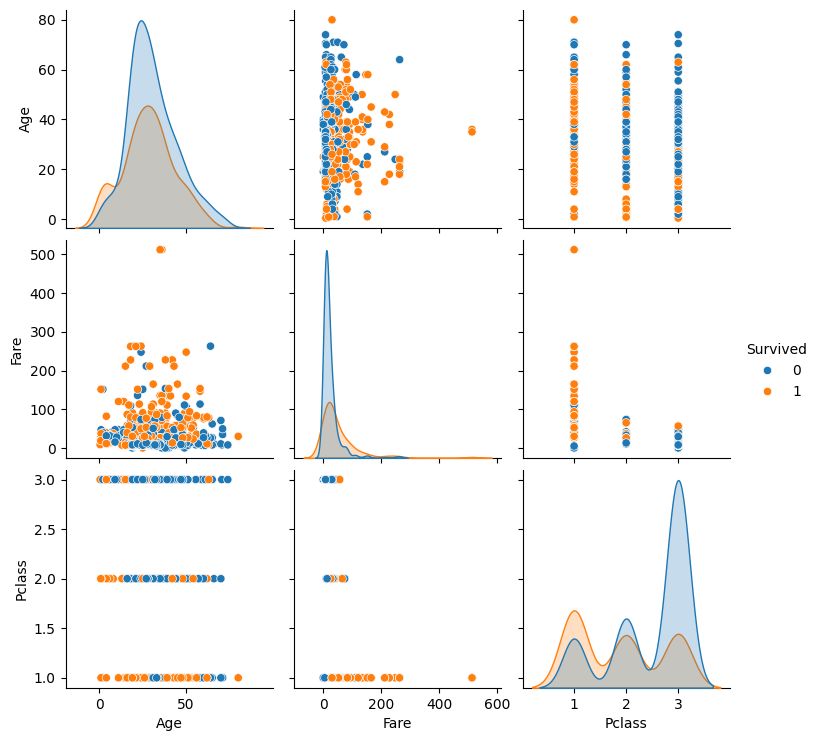

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>

In [4]:
# Pairplot for selected numeric features
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Skewness of Age: 0.38910778230082704
Skewness of Fare: 4.787316519674893


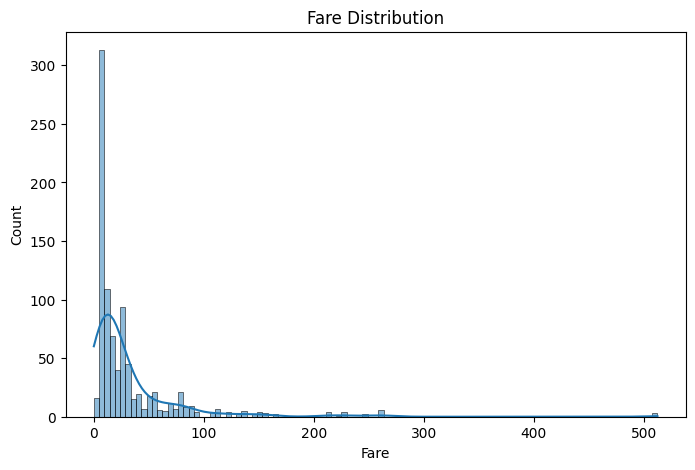

In [5]:
# Skewness check
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Fare:", df['Fare'].skew())

# Plot Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


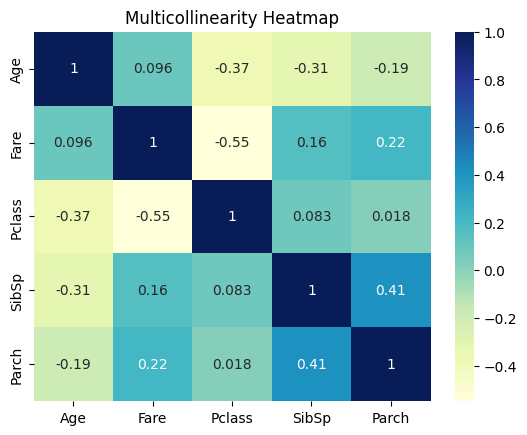

In [6]:
# Checking multicollinearity using correlation matrix again
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Multicollinearity Heatmap")
plt.show()


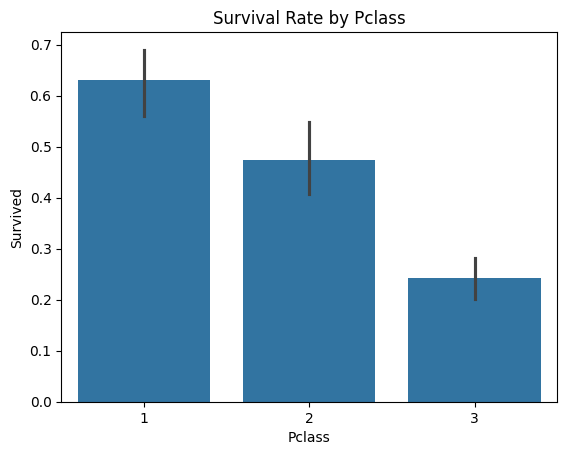

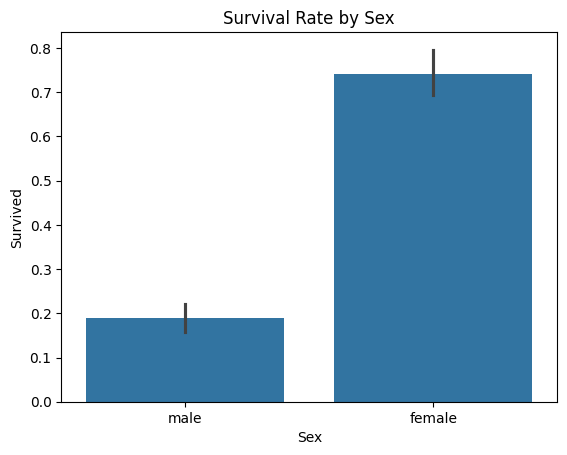

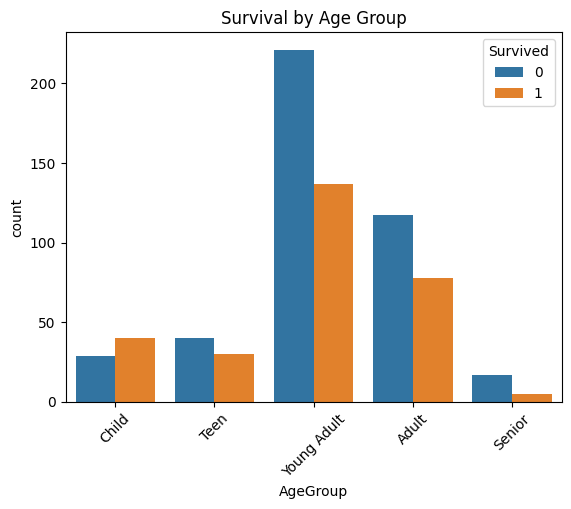

In [7]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Age group vs Survival
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.xticks(rotation=45)
plt.show()
